In [1]:
from CLasso import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
To generate the data :
'''

m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)

In [3]:
'''
To define the problem :
'''
problem = classo_problem(X,y,C)

In [4]:
'''
To solve the problem with its default parameters :
'''

problem.solve()

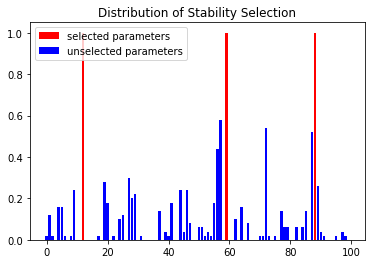

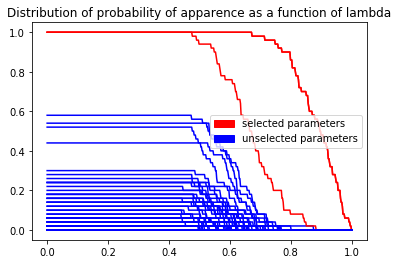

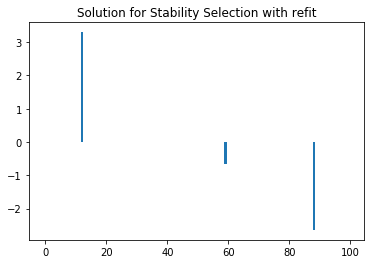

Cross Validation         : 'not computed'
Stability Selection      :  Running time for Stability Selection    : 4.394s
Solution for a fixed lam : 'not computed'

In [5]:
'''
To plot the solutions, as graphs :
'''
problem.solution

In [6]:
problem.solution.__dict__.keys()

dict_keys(['CV', 'SS', 'LAMfixed'])

In [7]:
'''
To see the variables in problem, 
then one can just print one of the components of problem : problem.data for example
'''

problem.__dict__.keys()

dict_keys(['data', 'formulation', 'model_selection', 'solution'])

In [8]:
'''
To see the formulation of the problem, either as a dictionary or as a string
'''
print(problem.formulation)

problem.formulation.__dict__

Concomitant


{'huber': False, 'concomitant': True, 'rho': 1.345}

In [9]:
'''
To see the model selection, either as a dictionary or as a string 
'''


print(problem.model_selection)

problem.model_selection.__dict__

SS, 


{'CV': False,
 'CVparameters': Nsubset = 5  lamin = 0.01;  numerical_method = choose,
 'SS': True,
 'SSparameters': method = first;  lamin = 0.01;  B = 50;  q = 10;  pourcent_nS = 0.5;  threshold = 0.9;  numerical_method = ODE,
 'LAMfixed': False,
 'LAMfixedparameters': lam = theoritical;  theoritical_lam = 0.399;  numerical_method = choose}

In [10]:
'''
To know what are the Stability Selection parameters :
(also works for Cross Validation parameters, or fixed Lam parameters)
'''

problem.model_selection.SSparameters.__dict__

{'seed': 1,
 'formulation': Concomitant,
 'numerical_method': 'ODE',
 'method': 'first',
 'B': 50,
 'q': 10,
 'pourcent_nS': 0.5,
 'lamin': 0.01,
 'hd': False,
 'lam': 'theoritical',
 'theoritical_lam': 0.564,
 'threshold': 0.9}

In [11]:
'''
To solve a problem different than the default parameters :

'''

problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = True
problem.formulation.concomitant             = False
problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.SSparameters.method = 'max'

In [12]:
problem.solve()

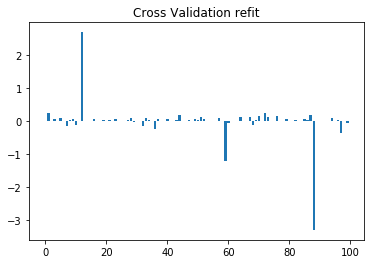

 Running time for Cross Validation    : 6.526s

In [13]:
problem.solution.CV

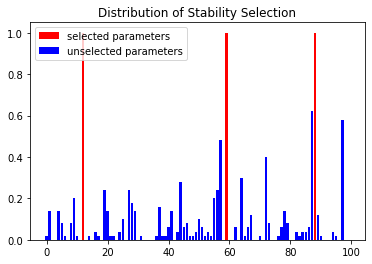

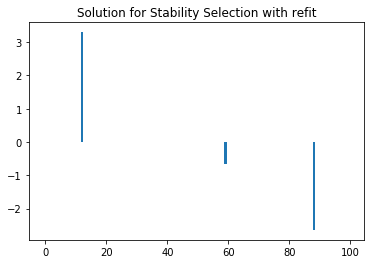

 Running time for Stability Selection    : 13.698s

In [14]:
problem.solution.SS

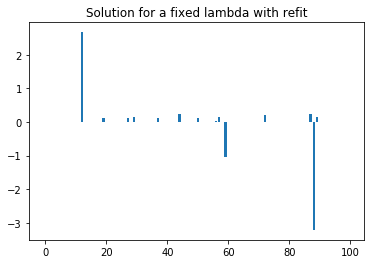

 Running time for LAM fixed       : 0.223s

In [15]:
problem.solution.LAMfixed

In [16]:
'''
To get a parameter of the solution :
'''

print("lambdamax = ", problem.solution.LAMfixed.lambdamax)

lambdamax =  169.51969146119802


In [17]:
'''
To show that the CV (also works for SS) depends only on the seed we choose :

'''
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.07397336919609833
